<a href="https://colab.research.google.com/github/ArindamRoy23/DSBA_T2_MLNS/blob/main/Community_Detection_community_louvai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
import networkx as nx
import community.community_louvain as community_louvai
import numpy as np

In [3]:
# Reference Paper: https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf



# Load the dataset
circles_file = "facebook_combined.txt"
G = nx.read_edgelist(circles_file)

# Compute the communities using the Louvain algorithm
partition = community_louvai.best_partition(G)

# Print the number of communities found
num_communities = len(set(partition.values()))
print("Number of communities found: ", num_communities)

# Print the nodes and their respective communities
for node, community_id in partition.items():
    print("Node:", node, "Community:", community_id)

Number of communities found:  16
Node: 0 Community: 0
Node: 1 Community: 0
Node: 2 Community: 0
Node: 3 Community: 0
Node: 4 Community: 0
Node: 5 Community: 0
Node: 6 Community: 0
Node: 7 Community: 0
Node: 8 Community: 0
Node: 9 Community: 0
Node: 10 Community: 0
Node: 11 Community: 0
Node: 12 Community: 0
Node: 13 Community: 0
Node: 14 Community: 0
Node: 15 Community: 0
Node: 16 Community: 0
Node: 17 Community: 0
Node: 18 Community: 0
Node: 19 Community: 0
Node: 20 Community: 0
Node: 21 Community: 0
Node: 22 Community: 0
Node: 23 Community: 0
Node: 24 Community: 0
Node: 25 Community: 0
Node: 26 Community: 0
Node: 27 Community: 0
Node: 28 Community: 0
Node: 29 Community: 0
Node: 30 Community: 0
Node: 31 Community: 0
Node: 32 Community: 0
Node: 33 Community: 0
Node: 34 Community: 1
Node: 35 Community: 0
Node: 36 Community: 0
Node: 37 Community: 0
Node: 38 Community: 0
Node: 39 Community: 0
Node: 40 Community: 0
Node: 41 Community: 0
Node: 42 Community: 0
Node: 43 Community: 0
Node: 44 

In [4]:

# Print the number of communities found
num_communities = len(set(partition.values()))
print("Number of communities found:", num_communities)

# Create a colormap for the communities
cmap = plt.get_cmap("Paired")
colors = [cmap(i) for i in np.linspace(0, 1, num_communities)]



Number of communities found: 16


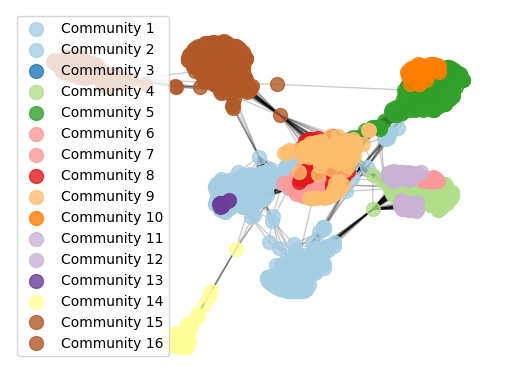

In [8]:
# Plot the nodes and edges with community colors
# pos = nx.spring_layout(G)
for i, community in enumerate(set(partition.values())):
    nodes = [node for node in partition.keys() if partition[node] == community]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[i], node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Add a legend
plt.legend(["Community {}".format(i+1) for i in range(num_communities)], loc='best')

# Show the plot
plt.axis("off")
plt.show()

In [50]:
predicted_community_dict = {}
for node, community_id in partition.items():
  try:
    predicted_community_dict[community_id].append(int(node))
  except:
    predicted_community_dict[community_id] = [int(node)]

In [68]:
# Testing output results 
ego_node_list = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]
output_dict = {}
for ego_node in ego_node_list:
  # For node 0
  # Open the file in read mode
  file = open(f'/content/{ego_node}.circles')

  # Read the contents of the file
  content = file.read()

  # Close the file
  file.close()

  # Print the contents of the file
  # print(('_'.join(content.split('\t'))).split('\n'))
  circle_list = [int(x) for x in content.replace('\t', '_').replace('\n', '_').split('_') if x.isdigit() == True]
  circle_list = set(circle_list)
  for node, community_id in partition.items():
    # print(node, community_id)
    if int(node) == int(ego_node):
      class_of_ego = community_id
      break
  predicted_circle = set(predicted_community_dict[class_of_ego])
  correct_score = len(circle_list.intersection(predicted_circle))/ (len(circle_list) + len(predicted_circle))
  print(f'Score for node {ego_node} = {correct_score}')
  output_dict[ego_node] = correct_score

Score for node 0 = 0.440625
Score for node 107 = 0.30227518959913324
Score for node 348 = 0.33692307692307694
Score for node 414 = 0.19507908611599298
Score for node 686 = 0.4521276595744681
Score for node 698 = 0.19230769230769232
Score for node 1684 = 0.39263803680981596
Score for node 1912 = 0.34774933804060015
Score for node 3437 = 0.15038759689922482
Score for node 3980 = 0.4915254237288136
